ДЗ 13 Бернатович 09.11.2022
# Цель

Не менее 20000 символов.
уменьшить размерность текста, используя метод главных компонент, при этом обеспечить сохранение информации не менее 80%


# Задачи:

- осуществить загрузку текста, токенизацию

- почистить данные (числа, знаки препинания, символы, стоп-слова)

- осуществить лемматизацию

- перевести в векторное представление

- применить метод главных компонент таким образом, чтобы потеря информации составила не более 20%

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- (если есть метки классов) посчитать результаты обучения. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные
https://data.world/crowdflower/2015-new-years-resolutions

In [2]:
df = pd.read_csv('New-years-resolutions-DFE.csv', encoding='cp1251')

In [3]:
df.head()

,other_topic,resolution_topics,gender,name,Resolution_Category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,"Read moore books, read less facebook.",Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",NaN,12/31/14 10:48,12/31/14,5.503630e+17,Southern California,CA,Pacific Time (US & Canada),West
1,NaN,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,12/31/14 10:47,12/31/14,5.503630e+17,New Jersey,NJ,Central Time (US & Canada),Northeast
2,NaN,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,NaN,12/31/14 10:46,12/31/14,5.503620e+17,Hollywood,CA,Eastern Time (US & Canada),West
3,Help More\nspread pet therapy|helping other,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,NaN,12/31/14 10:45,12/31/14,5.503620e+17,Metro NYC,NY,NaN,Northeast
4,NaN,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,12/31/14 10:44,12/31/14,5.503620e+17,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


<AxesSubplot:xlabel='gender', ylabel='count'>

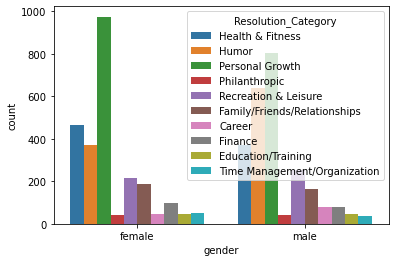

In [4]:
sns.countplot(data=df,x='gender',hue='Resolution_Category')

In [5]:
df['Resolution_Category'].value_counts()

Personal Growth                 1781
Humor                           1010
Health & Fitness                 840
Recreation & Leisure             467
Family/Friends/Relationships     351
Finance                          176
Career                           126
Education/Training                89
Time Management/Organization      87
Philanthropic                     84
Name: Resolution_Category, dtype: int64

In [6]:
df['text']

0       #NewYearsResolution :: Read more books, No scr...
1       #NewYearsResolution Finally master @ZJ10 's pa...
2       #NewYearsResolution to stop being so damn perf...
3       My #NewYearsResolution is to help my disabled ...
4       #NewYearsResolution #2015Goals #2015bucketlist...
                              ...                        
5006    Tomorrow I start @JustifiedFX because @natalie...
5007    holy crap, people. EYES OPEN WHEN DRIVING. #Ne...
5008    RT @moJO_SHabby: Start parody of her blog #NYR...
5009    RT @kscmaghirang: To have an excellent job bef...
5010    RT @tompycan: #NewYearsResolution on Jan1: "I'...
Name: text, Length: 5011, dtype: object

In [7]:
import re

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

away = "[А-Яа-я0-9!#$%&'()*©®»«–+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("english")
morph = MorphAnalyzer()

def lem(doc):
    doc = re.sub(away, ' ', doc)
    words = []
    for word in doc.split():
        if word and word not in stopwords_ru:
            word = word.strip()
            word = morph.normal_forms(word)[0]
            words.append(word)
    return words

In [8]:
#df['text'] = df['text'].apply(lem) 

In [9]:
df['text']

0       #NewYearsResolution :: Read more books, No scr...
1       #NewYearsResolution Finally master @ZJ10 's pa...
2       #NewYearsResolution to stop being so damn perf...
3       My #NewYearsResolution is to help my disabled ...
4       #NewYearsResolution #2015Goals #2015bucketlist...
                              ...                        
5006    Tomorrow I start @JustifiedFX because @natalie...
5007    holy crap, people. EYES OPEN WHEN DRIVING. #Ne...
5008    RT @moJO_SHabby: Start parody of her blog #NYR...
5009    RT @kscmaghirang: To have an excellent job bef...
5010    RT @tompycan: #NewYearsResolution on Jan1: "I'...
Name: text, Length: 5011, dtype: object

Проверим, есть ли какие-то строки с пустым текстом

In [10]:
df['text'].str.isspace().sum()

0

Признаки и целевая переменная

In [11]:
data = df[['Resolution_Category','text']]

In [12]:
data.head(6)

,Resolution_Category,text
0,Health & Fitness,"#NewYearsResolution :: Read more books, No scr..."
1,Humor,#NewYearsResolution Finally master @ZJ10 's pa...
2,Personal Growth,#NewYearsResolution to stop being so damn perf...
3,Philanthropic,My #NewYearsResolution is to help my disabled ...
4,Personal Growth,#NewYearsResolution #2015Goals #2015bucketlist...
5,Health & Fitness,#NewYearsResolution 1. Eat less.\n2.quit lying.


Разделим данные на признаки X и целевую переменную y, а также выполним разбиение на обучающий и тестовый наборы данных (train/test split).

In [13]:
y = df['Resolution_Category']
X = df['text']

Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
X_train

4037    You can't outrun your fork! #health #nutrition...
1889    "@chrisbrown: Supper club right now!!!! #NewYe...
490     I didn't fuck with any fuck niggas this year, ...
2009     #NewYearsResolution : lite sum illegal fireworks
2266    my only New Years resolution is to not spend m...
                              ...                        
4171    #NewYearsResolution\n\nLove her\nHang w/family...
599     RT @OnlyOneSilletti: #NewYearsResolution is to...
1361    RT @Jawdann_: #NewYearsResolution Get Bigger A...
1547    The people that keep me positive will follow m...
4959                #NewYearsResolution stop being washed
Name: text, Length: 4008, dtype: object

Векторизация

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(stop_words='english')

In [19]:
matrix = cv.fit_transform(df['text'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# Сортируем от больших к меньшим
print("Top 20 words used")
print(sorted(freqs, key=lambda x: -x[1])[:20])
dn=sorted(freqs, key=lambda x: -x[1])[:20]

Top 20 words used
[('newyearsresolution', 3957), ('new', 1589), ('resolution', 1308), ('years', 1248), ('2015', 756), ('rt', 681), ('http', 650), ('year', 619), ('stop', 358), ('make', 312), ('amp', 254), ('time', 221), ('people', 205), ('don', 188), ('like', 186), ('start', 184), ('better', 180), ('going', 180), ('just', 174), ('ы_', 173)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(stop_words='english')

In [22]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [23]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
X_train_tfidf

<4008x8114 sparse matrix of type '<class 'numpy.float64'>'
	with 32210 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.decomposition import PCA

In [26]:
model = PCA() #создание экземпляра класса анализа главных компонент

In [27]:
results = model.fit(X)

ValueError: could not convert string to float: "#NewYearsResolution :: Read more books, No scrolling FB/checking email b4 breakfast, stay dedicated to PT/yoga to squash my achin' back!"